## Euclidean Distance and Correlation Analysis

# A Amar Rohith,EC21B1106

1.	Given tabular data is collected at a small ice cream store. To determine if there is a correlation between temperature and the number of customers, calculate the Pearson correlation coefficient, without using any built-in functions or libraries. Compare your results with calculation using the inbuilt function. ion.tiontion

In [10]:
import numpy as np
import pandas as pd
import scipy as sp
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [11]:
def euclidian_distance(a,b):
    res=0
    for i in range(len(a)):
        res=res+(a[i]-b[i])**2
    res=np.sqrt(res)
    return res      
print(euclidian_distance((0,0),(12,5)))

13.0


In [12]:
dict_data={'Temperature':[98,87,90,85,95,75,92,80,88,93],"Number of customers":[15,12,10,10,16,7,14,9,11,13]}
df=pd.DataFrame(dict_data)
print(df)

mean_temp=(df['Temperature'].sum())/(len(df['Temperature']))
mean_cust=(df['Number of customers'].sum())/(len(df['Number of customers']))
print(mean_temp)
print(mean_cust)
numerator = sum([(i-mean_temp)*(j-mean_cust) for i,j in zip(df['Temperature'],df['Number of customers'])])
denominator=np.sqrt(sum([((i-mean_temp)**2) for i in df['Temperature']])*sum([((j-mean_cust)**2) for j in df['Number of customers']]))


print(numerator/denominator)
df['Temperature'].corr(df['Number of customers'],method="pearson")

   Temperature  Number of customers
0           98                   15
1           87                   12
2           90                   10
3           85                   10
4           95                   16
5           75                    7
6           92                   14
7           80                    9
8           88                   11
9           93                   13
88.3
11.7
0.9186718493897071


0.9186718493897073

2.	You are given the famous Iris dataset (iris.csv), which contains samples of iris flowers, each described by four features: sepal length, sepal width, petal length, and petal width. The dataset is labeled with three classes: Setosa, Versicolor, and Virginica. The iris.csv is present in the Submission link.

a.	First take 2 dimensions/features, that is, Sepal Length and Sepal Width.

In [13]:
df=pd.read_csv('iris.csv')
df_temp=df.loc[:,['sepal.length','sepal.width']]
print(df)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


i.	Load the Iris dataset and split it into a training set and a testing set. The testing set should contain the first 3 samples of each class. Do NOT use the inbuilt function for splitting the data.

In [14]:
test_dataset=df.groupby("variety").head(3).loc[:,['sepal.length','sepal.width','variety']]
print(test_dataset)
training_dataset=df.groupby("variety").tail(-3).loc[:,['sepal.length','sepal.width','variety']]
print(training_dataset)

     sepal.length  sepal.width     variety
0             5.1          3.5      Setosa
1             4.9          3.0      Setosa
2             4.7          3.2      Setosa
50            7.0          3.2  Versicolor
51            6.4          3.2  Versicolor
52            6.9          3.1  Versicolor
100           6.3          3.3   Virginica
101           5.8          2.7   Virginica
102           7.1          3.0   Virginica
     sepal.length  sepal.width    variety
3             4.6          3.1     Setosa
4             5.0          3.6     Setosa
5             5.4          3.9     Setosa
6             4.6          3.4     Setosa
7             5.0          3.4     Setosa
..            ...          ...        ...
145           6.7          3.0  Virginica
146           6.3          2.5  Virginica
147           6.5          3.0  Virginica
148           6.2          3.4  Virginica
149           5.9          3.0  Virginica

[141 rows x 3 columns]


<Axes: xlabel='sepal.length', ylabel='sepal.width'>

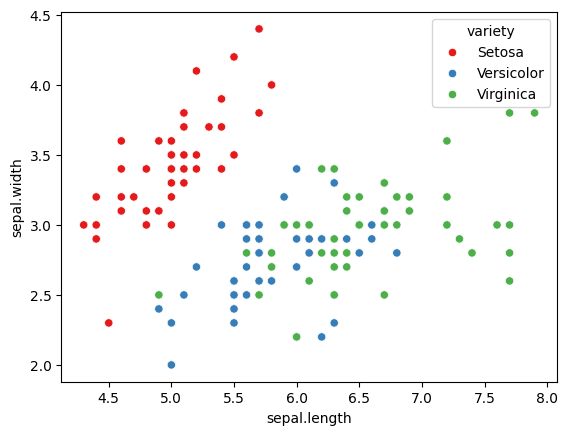

In [15]:
sns.scatterplot(data=training_dataset,hue='variety',x='sepal.length',y='sepal.width',palette='Set1')

iii.	For each sample in the testing set, compute its Euclidean distance to all samples in the training set. 

In [34]:
from scipy.spatial.distance import cdist
x_train=training_dataset.loc[:,['sepal.length','sepal.width']]
y_train=training_dataset.loc[:,['variety']]
x_test=test_dataset.loc[:,['sepal.length','sepal.width']]
y_test=test_dataset.loc[:,'variety']
distances1 = cdist(x_test,x_train, metric='euclidean')
distances2=[]
for x1 in x_test.to_numpy():
    rows=[]
    for x2 in x_train.to_numpy():
        rows.append(euclidian_distance(x1,x2))
    distances2.append(rows)
print(len(distances1),len(distances2),sep='\n')
print(y_train.to_numpy().flatten())

9
9
['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor'

iv.	Identify the K-nearest neighbors with the smallest Euclidean distances for each sample in the testing set, where K is a hyperparameter. 

In [40]:
K=6
nearest_neighbors_indices = np.argsort(distances1, axis=1)[:, :K]
print(nearest_neighbors_indices)

[[ 14  37  40  36  24   1]
 [ 22  31   6  42   9  27]
 [ 26  44  27   0   8  21]
 [111 130 132 116 134 103]
 [106 101 128  50  95 107]
 [132 130 111 134 103  59]
 [ 50 127 139 106 128 101]
 [ 76 133  61 105  86  93]
 [120 132 130  98 116 111]]


v.	Determine the majority class among the K-nearest neighbors and assign it as the predicted class for the sample.

In [41]:

'''def predict_class(indices):
    nearest_classes = y_train[indices]
    majority_class = Counter(nearest_classes).most_common(1)[0][0]
    return majority_class
predicted_classes = [predict_class(indices) for indices in nearest_neighbors_indices]

for i, prediction in enumerate(predicted_classes):
    print(f"Test sample {i} is predicted to be in class: {prediction}")
    print(f"Actual class: {y_test[i]}")
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Accuracy of the custom KNN classifier: {accuracy:.2f}")'''
y_output=[]
for i in nearest_neighbors_indices:
    count=Counter([y_train.to_numpy().flatten()[j] for j in i])
    y_output.append(max(count,key=lambda x:count[x]))
print(y_output)
print(y_test.to_numpy().flatten())
    

['Setosa', 'Setosa', 'Setosa', 'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Versicolor', 'Virginica']
['Setosa' 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor'
 'Virginica' 'Virginica' 'Virginica']


b.	Repeat the same for all the four dimensions and skip plotting the data.

In [93]:
df = pd.read_csv('iris.csv')
df.columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']
test_set = df.groupby('variety').head(3)
train_set = df.drop(test_set.index)
X_train = train_set[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].to_numpy()
y_train = train_set['variety'].to_numpy()
X_test = test_set[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].to_numpy()
y_test = test_set['variety'].to_numpy()
K = 3
distances = cdist(X_test, X_train, metric='euclidean')

def predict_class(distances_row, y_train, K):
    nearest_neighbors_indices = np.argsort(distances_row)[:K]
    nearest_classes = y_train[nearest_neighbors_indices]
    majority_class = Counter(nearest_classes).most_common(1)[0][0]
    return majority_class

predicted_classes = [predict_class(row, y_train, K) for row in distances]
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Accuracy of the custom KNN classifier: {accuracy:.2f}")
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)
sklearn_predictions = knn.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
print(f"Accuracy of sklearn KNN classifier: {sklearn_accuracy:.2f}")
print(f"Custom KNN classifier accuracy: {accuracy:.2f}")
print(f"sklearn KNN classifier accuracy: {sklearn_accuracy:.2f}")


Accuracy of the custom KNN classifier: 1.00
Accuracy of sklearn KNN classifier: 1.00
Custom KNN classifier accuracy: 1.00
sklearn KNN classifier accuracy: 1.00


3.  For the same IRIS dataset, your next task is to perform correlation analysis to understand the relationships between these attributes.

In [76]:
df = pd.read_csv('iris.csv')

print(df.head())
print(df.columns)

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


In [77]:
print(df.describe())

       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000


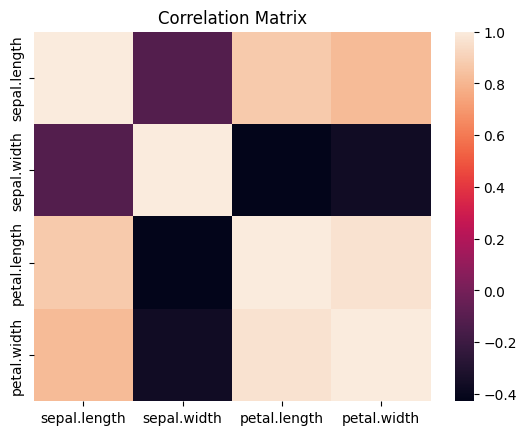

In [58]:
'''numerical_df = df.select_dtypes(include=[float, int])
print(numerical_df.head())
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Iris Dataset Attributes')
plt.show()
threshold = 0.7
highly_correlated = (correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]
                     .stack()
                     .reset_index()
                     .rename(columns={0: 'correlation'}))

print(highly_correlated)'''

def correlation(a,b):
    mean_a=sum(a)/len(a)
    mean_b=sum(b)/len(b)
    numerator=np.sum((a-mean_a)*(b-mean_b))
    denominator=np.sqrt(np.sum((a-mean_a)**2) * (np.sum((b-mean_b)**2)))
    return numerator/denominator

correlation_matrix=[]
numerical_df = df.select_dtypes(include=[float, int]).to_numpy().T

for i in numerical_df:
    temp=[]
    for j in numerical_df:
        temp.append(correlation(i,j))
    correlation_matrix.append(temp)
df_display=pd.DataFrame(correlation_matrix,columns=df.select_dtypes(include=[float, int]).columns.to_numpy(),index=df.select_dtypes(include=[float, int]).columns.to_numpy())
print(df_display)
sns.heatmap(data=df_display)        
plt.title('Correlation Matrix')   
plt.show()
#print(numerical_df.to_numpy().T)


Given (hq − ht)^T = (0.5 0.5 -0.5 -0.25 -0.25) and 
Find the quadratic form distance.


In [86]:

v = np.array([0.5, 0.5, -0.5, -0.25, -0.25])

A = np.array([
    [1, 0.135, 0.195, 0.137, 0.157],
    [0.135, 1, 0.2, 0.309, 0.143],
    [0.195, 0.2, 1, 0.157, 0.122],
    [0.137, 0.309, 0.517, 1, 0.195],
    [0.157, 0.143, 0.122, 0.195, 1]
])


d_squared = np.dot(v, np.dot(A, v))

print(f"Quadratic form distance : {d_squared}")

Quadratic form distance : 0.6976249999999999
